## Imports

In [1]:
import os
import sys
import librosa
from librosa import display
from IPython.display import Audio
import matplotlib.pyplot as plt

print(os.getcwd())
sys.path.append(os.getcwd().replace('notebooks', 'scripts'))

import notebook_utils as nou

/Users/Lukas/Documents/J.A.R.V.I.S./bed/notebooks


## 1. Basic Visualizing

In [2]:
desk_path = '../data/desk.wav'
worm_path = '../data/worms.wav'

Audio(desk_path)

In [3]:
desk_samples, desk_sr = librosa.load(desk_path, sr=None, mono=True, offset=0.0, duration=None)
worms_samples, worms_sr = librosa.load(worm_path, sr=None, mono=True, offset=0.0, duration=None)

print(f"{desk_path}: {len(desk_samples)/desk_sr:.2f}s with sampling rate of {desk_sr / 1e3}kHz.")
print(f"{worm_path}: {len(worms_samples)/worms_sr:.2f}s with sampling rate of {worms_sr / 1e3}kHz.")

../data/desk.wav: 5.40s with sampling rate of 44.1kHz.
../data/worms.wav: 5.53s with sampling rate of 44.1kHz.


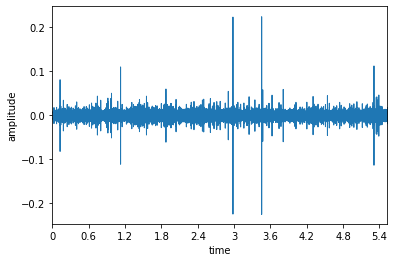

In [4]:
plt.figure()
librosa.display.waveplot(y=worms_samples, sr=worms_sr)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

## 2. FFT

44100


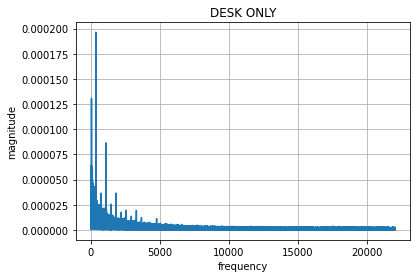

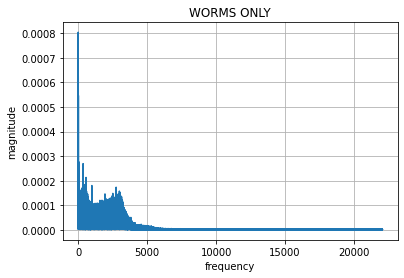

In [5]:
print(worms_sr)
nou.plot_fft(desk_samples, desk_sr, "DESK ONLY")
nou.plot_fft(worms_samples, worms_sr, "WORMS ONLY")

## 3. Spectograms